# Fractional Brownian Expectations
Let $Z_t^H$ denote a fractional brownian motion path with parameter $H$ as a function of time. The mean, variance and covariance are given by,<br>

$
\begin{align}
&\text{E}[Z^H_t] = 0 \\
&\text{Var}[Z_t^H] = t^{2H} \\
&R^H(t,s) = \text{Cov}[Z^H_t Z^H_s] = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}],
\end{align}
$

where $t > s$.

Let $\Delta Z^H_t$ denote an increment of fractional brownian noise. The autocorrelation function of noise increments<br>
separated in time by $n$ is given by,

$
\begin{align}
&\text{Var}[\Delta Z_t^H] = \Delta t^{2H} \\
&\rho^H_n = \frac{\text{Cov}[\Delta Z^H_k \Delta Z^H_{k+n}]}{\sqrt{\text{Var}[\Delta Z^H_k]\text{Var}[\Delta Z^H_{k+n}]}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

### Limits of Variance, Covariance and Autocorrelation
The Qualitative behavior of fractional brownian motions has three different regimes</br> 
as a function of H, </br>

$
\begin{align}
1.&\hspace{3mm} 0 < H < \frac{1}{2} \\
2.&\hspace{3mm} H=\frac{1}{2} \\
3.&\hspace{3mm} \frac{1}{2} < H < 1
\end{align}
$

Also, the limit $t \gg 1$ will be considered

#### $H \rightarrow 0$

$
\begin{align}
\lim_{H \to 0}&\hspace{1mm} \text{Var}[Z_t^H] = 1 \\
\lim_{H \to 0}&\hspace{1mm} R^H(t,s) = \frac{1}{2} \\
\lim_{H\to 0}&\hspace{1mm} \rho^H_n = 0
\end{align}
$

#### $H \rightarrow \frac{1}{2}$

$
\begin{align}
\lim_{H \to \frac{1}{2}}&\hspace{1mm}  \text{Var}[Z_t^H] = t \\
\lim_{H \to \frac{1}{2}}&\hspace{1mm} R^H(t,s) = s \\
\lim_{H\to \frac{1}{2}}&\hspace{1mm} \rho^H_n = 0
\end{align}
$

#### $H \rightarrow 1$

$
\begin{align}
\lim_{H \to 1}&\hspace{1mm} \text{Var}[Z_t^H] = t^2 \\
\lim_{H \to 1}&\hspace{1mm} R^H(t,s) = ts \\
\lim_{H \to 1}&\hspace{1mm} \rho^H_n = \Delta t^2
\end{align}
$

#### $t \gg 1$

$
\begin{align}
&\text{Var}[Z_t^H] = t^{2H} \\
&R^H(t,s) \approx \frac{1}{2}\left( s^{2H} + 2Hst^{2H-1} \right) \\
&\rho^H_n \approx \Delta t^{2H}H(2H-1)^{2H-2}
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import config
from lib import plots

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
def labels(H_vals):
    return [f"H={format(H, '1.2f')}" for H in H_vals]

def acf(H_vals, time):
    return [fbm.acf(H, time) for H in H_vals]

def cov(H_vals, s, time):
    return [fbm.cov(H, s, time) for H in H_vals]    

def var(H_vals, time):
    return [fbm.var(H, time) for H in H_vals]

## $\text{Var}[Z_t^H] = t^{2H}$

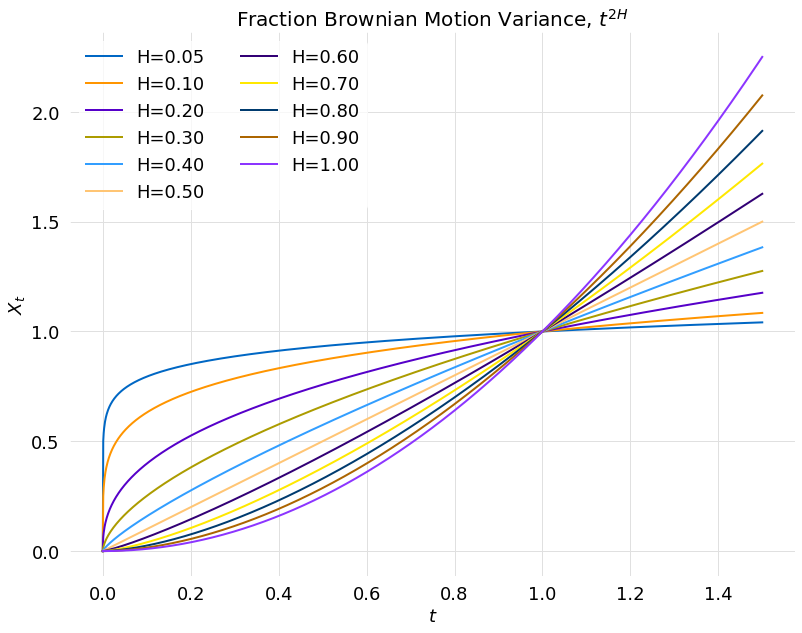

In [3]:
tmax = 1.5
Δt = 0.001
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

time = numpy.linspace(0.0, tmax, nsteps)
title = r"Fraction Brownian Motion Variance, $t^{2H}$"
plots.comparison(var(H_vals, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.5, 0.65])

## $R^H(t,s) = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}]$

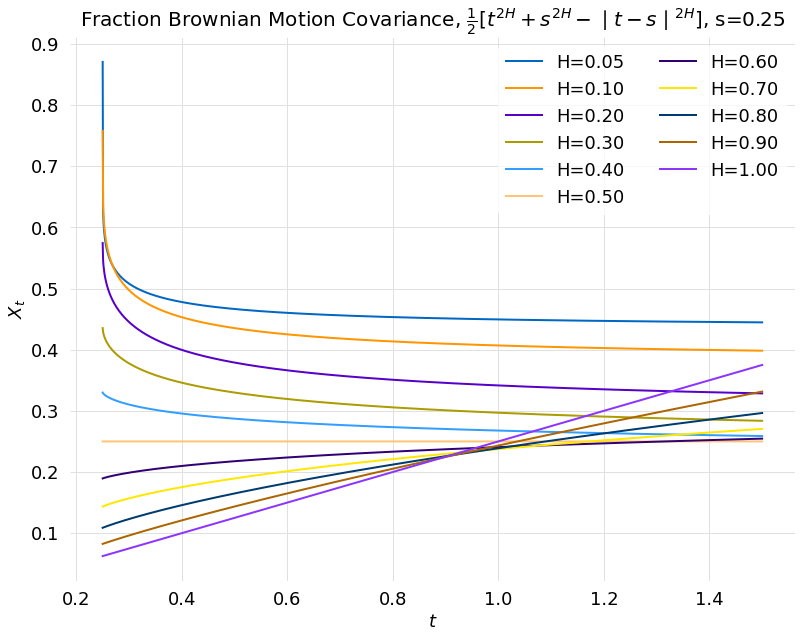

In [4]:
tmax = 1.5
Δt = 0.001
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
s = 0.25
time = numpy.linspace(s, tmax, nsteps)

title = r"Fraction Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}"
plots.comparison(cov(H_vals, s, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.5, 0.5])

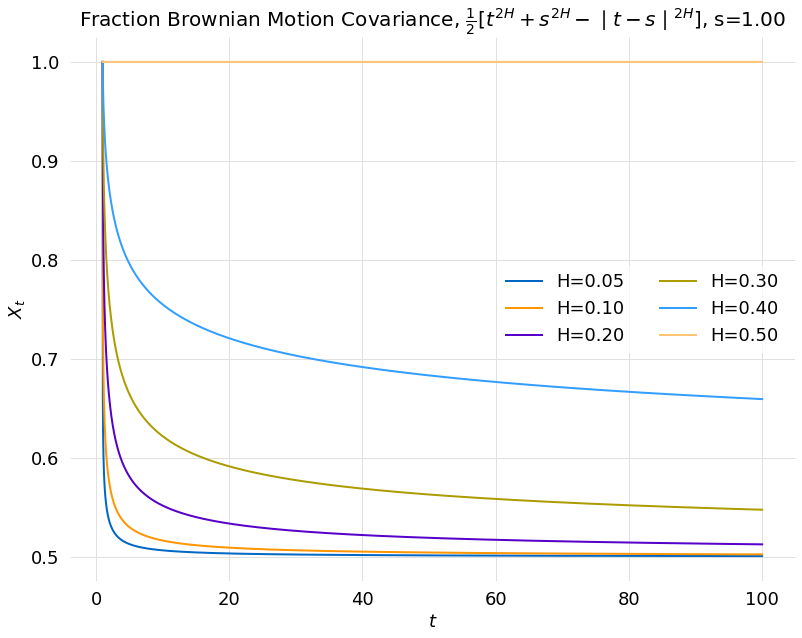

In [5]:
tmax = 100
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
s = 1.0
time = numpy.linspace(s, tmax, nsteps)

title = r"Fraction Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}"
plots.comparison(cov(H_vals, s, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.85, 0.85])

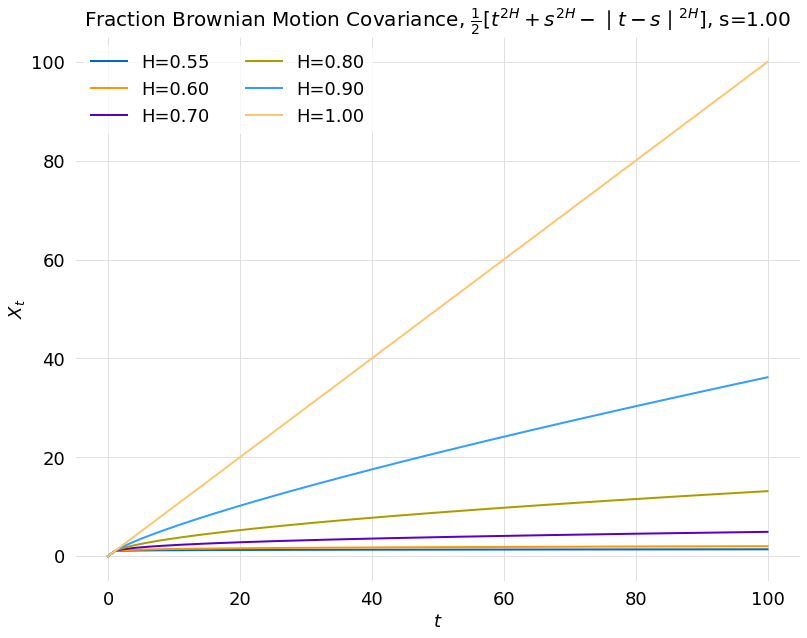

In [6]:
tmax = 100
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.55, 0.6, 0.7, 0.8, 0.9, 1.0]
time = numpy.linspace(0.0, tmax, nsteps)
s = 1.0

title = r"Fraction Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}"
plots.comparison(cov(H_vals, s, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.5, 0.9])

## $\rho^H_n = \frac{1}{2} [(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$

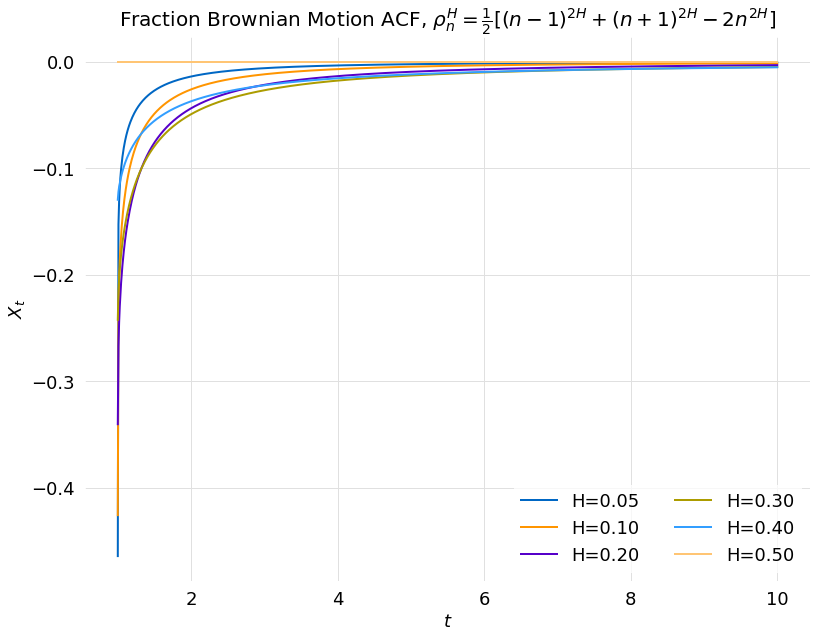

In [7]:
tmax = 10.0
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
time = numpy.linspace(1.0, tmax, nsteps)

title = r"Fraction Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
plots.comparison(acf(H_vals, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.5, 0.85])

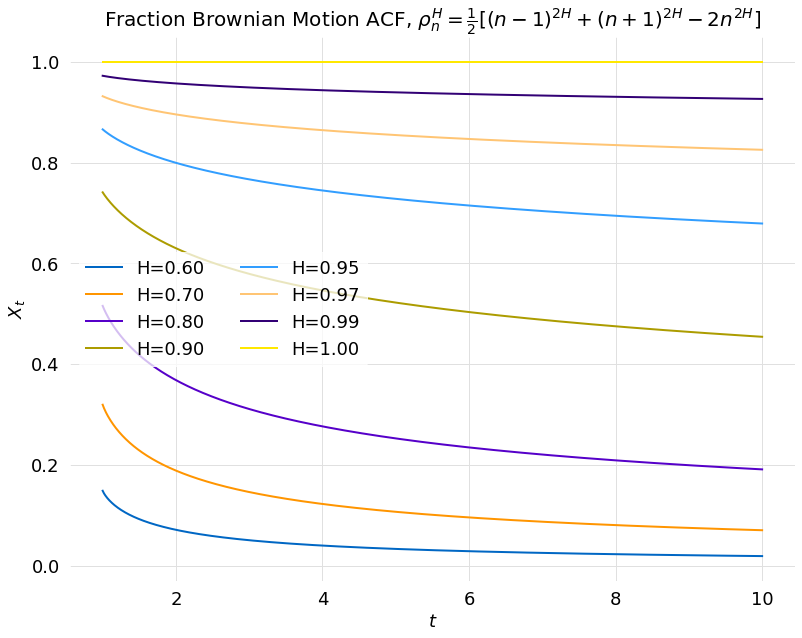

In [8]:
tmax = 10.0
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
time = numpy.linspace(1.0, tmax, nsteps)

title = r"Fraction Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
plots.comparison(acf(H_vals, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.45, 0.85])

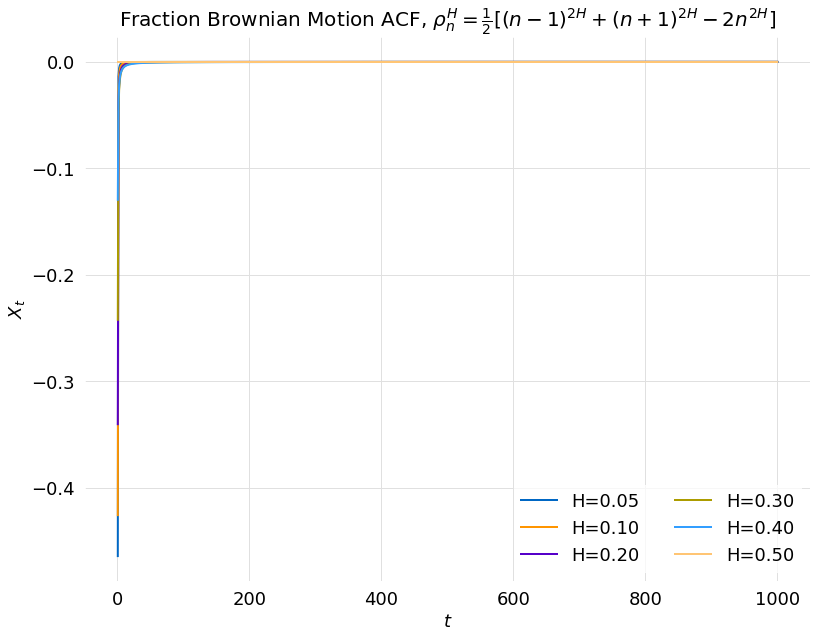

In [9]:
tmax = 1000.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
time = numpy.linspace(1.0, tmax, nsteps)

title = r"Fraction Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
plots.comparison(acf(H_vals, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.45, 0.85])

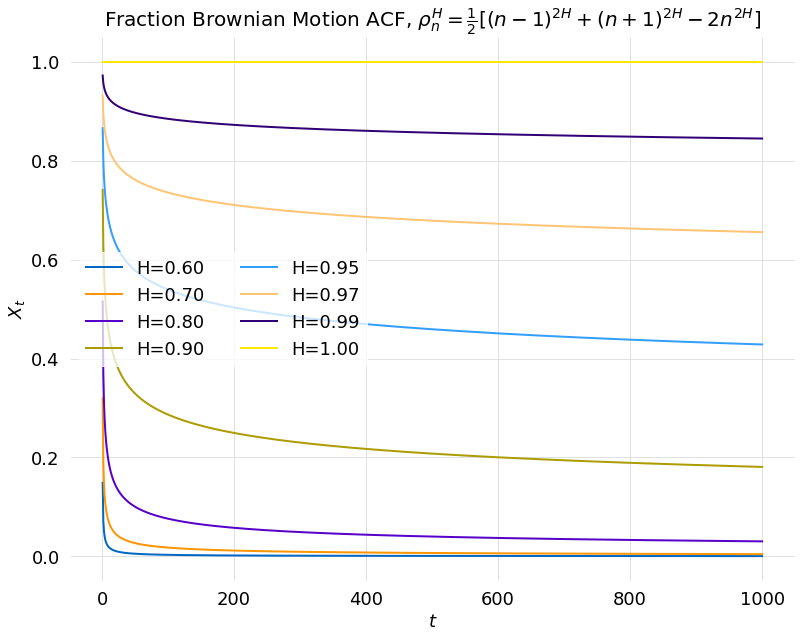

In [10]:
tmax = 1000.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
time = numpy.linspace(1.0, tmax, nsteps)

title = r"Fraction Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
plots.comparison(acf(H_vals, time), x=time, title=title, labels=labels(H_vals), lengend_location=[0.45, 0.75])